## function: import dataset

In [1]:
def import_dataset():
    global train_labels, train_images
    import numpy as np

    train_labels = np.loadtxt('C:\\Users\\Marko Visnjic\\Custom_HandwrittenMultiDigits_Dataset\\train_labels\\train_labels.csv', delimiter=',')
    train_labels = train_labels.astype('uint8')

    train_images = []
    
    ##git test

    for i in range(len(train_labels)):
        path = f"C:\\Users\\Marko Visnjic\\Custom_HandwrittenMultiDigits_Dataset\\train_images\\dataset_index__{i+1}.csv"
        image = np.loadtxt(path, delimiter=',')
        image = image.astype('uint8')
        train_images.append(image)

    train_images = np.array(train_images, dtype = 'uint8')


## function: create filters

In [2]:
def create_filters():
    global conv_filter, conv_filter_array
    
    
    conv_filter_array = []
    math_symbols_list = [48,49,50,51,52,53,54,55,56,57,43] #presented in ascii decimal format, for example, 43 represents '+'
    char_math_symbols_list = [0,1,2,3,4,5,6,7,8,9,43]

    for p in char_math_symbols_list:
        
        conv_filter = []
        images = []


        for i in range(len(train_labels)):
            if (train_labels[i] == p):
                path = f"C:\\Users\\Marko Visnjic\\Custom_HandwrittenMultiDigits_Dataset\\train_images\\dataset_index__{i+1}.csv"
                image = np.loadtxt(path, delimiter=',')
                image = image.astype('uint8')
                images.append(image)
                

        
        for i in range(0,100):
            for j in range(0,100):
                summation = 0
                count = 0
                average = 0
                for k in range(len(images)):
                    summation = summation + images[k][i,j]
                    count = count + 1

                average = summation/count
                conv_filter.append(int(average))
                summation = 0
                average = 0
                count = 0

        conv_filter = np.array(conv_filter)
        conv_filter = np.reshape(conv_filter, (100,100))
        conv_filter_array.append(conv_filter)

        plt.imshow(conv_filter)
        plt.show()


## function: crop_drawing

In [3]:
def crop_drawing():
    global cropped_images
    cropped_images = []

    for z in range(len(drawing)):

        left_boundary = 0

        right_boundary = 0


        for x in range (drawing[z].shape[1]):
            if (drawing[z][:,x].any()):
                left_boundary = x - 1
                break


        drawing[z] = np.delete(drawing[z], slice(0,left_boundary+1), 1)


        for x in range (drawing[z].shape[1]-1, 0, -1):
            if (drawing[z][:,x].any()):
                right_boundary = x
                break

        drawing[z] = np.delete(drawing[z], slice(right_boundary+1,drawing[z].shape[1]+1000), 1)

        top_boundary = 0
        bottom_boundary = 0

        for x in range (drawing[z].shape[0]):
            if (drawing[z][x,:].any()):
                top_boundary = x - 1
                break

        drawing[z] = np.delete(drawing[z], slice(0, top_boundary+1), 0)

        for x in range (drawing[z].shape[0]-1, 0, -1):
            if (drawing[z][x,:].any()):
                bottom_boundary = x
                break

        drawing[z] = np.delete(drawing[z], slice(bottom_boundary+1, drawing[z].shape[0]+1000), 0)

        prev_column = True

        vertical_cuts = []

        for x in range (drawing[z].shape[1]):
            if ((drawing[z][:,x].any() == False) & (prev_column == True)):
                vertical_cuts.append(x)
                prev_column = False

            elif ((drawing[z][:,x].any() == True) & (prev_column == False)):
                vertical_cuts.append(x)
                prev_column = True

            elif ((drawing[z][:,x].any() == False) & (prev_column == False)):
                prev_column = False

            elif ((drawing[z][:,x].any() == True) & (prev_column == True)):
                prev_column = True


        cropped_images.append(drawing[z][:, slice(0,vertical_cuts[0])])

        for x in range(1, len(vertical_cuts)-1, 2):
            cropped_images.append(drawing[z][:, slice(vertical_cuts[x],vertical_cuts[x+1])])


        cropped_images.append(drawing[z][:, slice(vertical_cuts[len(vertical_cuts)-1],drawing[z].shape[1])])


        top_cutoff = 0
        bottom_cutoff = 0

        for x in range(len(cropped_images)):

            for i in range (cropped_images[x].shape[0]):
                if (cropped_images[x][i,:].any()):
                    top_cutoff = i
                    break

            cropped_images[x] = np.delete(cropped_images[x], slice(0, top_cutoff), 0)

            for j in range (cropped_images[x].shape[0]-1, 0, -1):
                if (cropped_images[x][j,:].any()):
                    bottom_cutoff = j
                    break

            cropped_images[x] = np.delete(cropped_images[x], slice(bottom_cutoff+1, 100000000), 0)


        vertical_cuts = []


    for x in range(len(cropped_images)):
          plt.imshow(cropped_images[x])
          plt.show()
    

## function: center symbols to 100x100 canvas

In [4]:
def center_images():    
    global centered_images
    
    #cropping scanned pixels so that the image then the drawn number just touches the boundaries of the canvas on all sides

    #everything to the right of left_cutoof_line_x_position, everything to the top of bottom_cutoff_line_y_position,
    #everything to the left of right_cutoff_line_x_position, and everything to the bottom of top_cutoff_line_y_position,
    #is kept

    centered_images = []

    scanning_square_size = 200


    for i in range(len(cropped_images)):

        image = cropped_images[i]

        #image = cv2.resize(image, (int(image.shape[1]*0.6),int(image.shape[0]*0.6)), interpolation = cv2.INTER_NEAREST)

        centered_dimensions = image.shape[np.argmax(image.shape)] + 10

        #centered_dimensions = 100

        #print(image.shape)

        #plt.imshow(image)
        #plt.show()




        #define padding array for numpy insert function
        padding_insert = []
        for _ in range (0,image.shape[1]):
            padding_insert.append(0)
        padding_insert



        #define padding array for numpy append function
        padding_append = []
        row = []
        for _ in range (0,image.shape[1]):
            row.append(0)
        padding_append.append(row)
        padding_append




        #insert top with zero padding and append bottom with zero padding until certain vertical dimension is reached

        while True:
            if (image.shape[0] < centered_dimensions):
                image = np.insert(image,0,padding_insert, axis=0)
            else:
                break
            if (image.shape[0] < centered_dimensions):
                image = np.append(image,padding_append, axis=0)
            else:
                break



        #define padding array for numpy append function
        padding_append_column = []
        for _ in range (0,image.shape[0]):
            padding_append_column.append([0])
        padding_append_column



        #insert left with zero padding and insert right with zero padding until certain dimension is reached

        while True:
            if (image.shape[1] < centered_dimensions):
                image = np.insert(image,0,0, axis=1)
            else:
                break
            if (image.shape[1] < centered_dimensions):
                image = np.append(image,padding_append_column, axis=1)
            else:
                break




        image = np.reshape(image, (centered_dimensions,centered_dimensions))
        image = image.astype('uint8')
        #image = cv2.resize(image, (28,28), interpolation = cv2.INTER_NEAREST)

        centered_images.append(image)


    for x in range(len(centered_images)):
        centered_images[x] = cv2.resize(centered_images[x], (100,100), interpolation = cv2.INTER_NEAREST)

    for x in range(len(centered_images)):
        plt.imshow(centered_images[x])
        plt.show()

## function: generate score_array for every centered image

In [5]:
def generate_scores():
    global equation
    
    train_labels
    images = []
    scores = []
    equation = []
    math_symbols_list = [48,49,50,51,52,53,54,55,56,57,43] #presented in ascii decimal format, for example, 43 represents '+'
    char_math_symbols_list = [0,1,2,3,4,5,6,7,8,9,43]

    for n in range(len(centered_images)):
        score = 0
        lowest_score = 0
        lowest_score_index = 0
        scores = []
        loss_matrix = []

        for k in range(len(conv_filter_array)):

            loss = 0
            score = 0
            loss_matrix = []

            for i in range(0,100):
                for j in range (0,100):
                    loss = abs(centered_images[n][i,j] - conv_filter_array[k][i,j])
                    loss_matrix.append(loss)

            loss_matrix = np.array(loss_matrix)
            loss_matrix = np.reshape(loss_matrix, (100,100))

            plt.imshow(loss_matrix)
            plt.show()


            score = 0

            for i in range(0,100):
                for j in range(0,100):
                    if (loss_matrix[i,j] > 240):
                        score = score + 1

            scores.append(score)


        scores = np.array(scores)
        print(scores)
        
        lowest_score = scores[0]

        for p in range(len(scores)):
            if (lowest_score >= scores[p]):
                lowest_score = scores[p]
                lowest_score_index = p


        print(f"The number that is guessed is: {math_symbols_list[lowest_score_index]}")

        equation.append(math_symbols_list[lowest_score_index])



## function: print equation and result

In [6]:
def print_eqn_and_result(): 
    equation_string = ""

    for i in range(len(equation)):
            equation_string = equation_string + chr(equation[i])

    print(f"You put in: {equation_string}")

    first_number = ''
    second_number = ''
    side = 'left' #left or right side of the plus sign, first number on left second on right

    for i in range(len(equation_string)):
        if (equation_string[i] != '+'):
            if (side == 'left'):
                first_number = first_number + equation_string[i]
            else:
                second_number = second_number + equation_string[i]
        else:
            side = 'right'

    print(f"The answer to your question is: {int(first_number) + int(second_number)}")

## tkinter

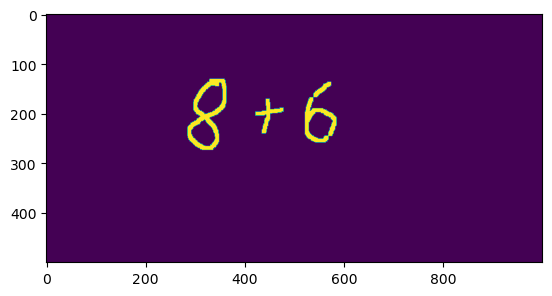

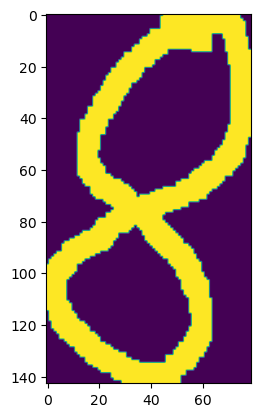

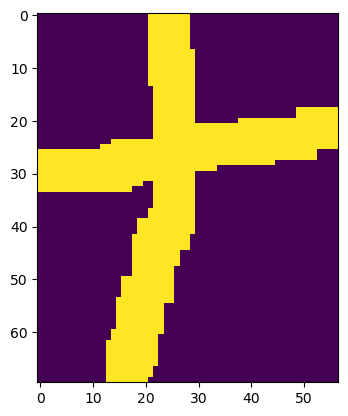

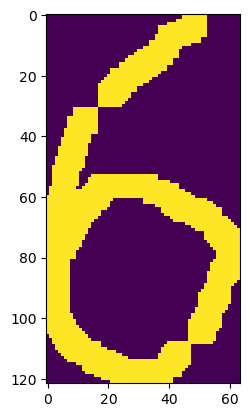

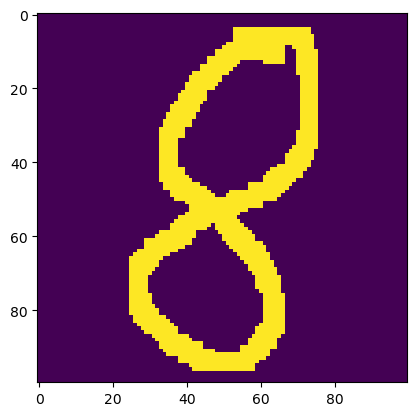

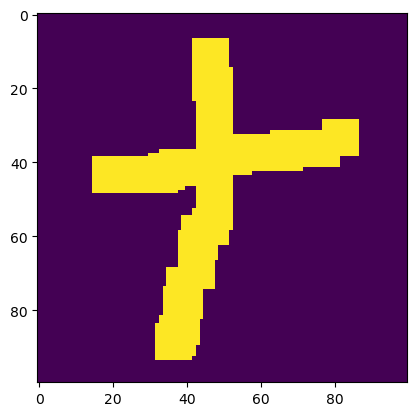

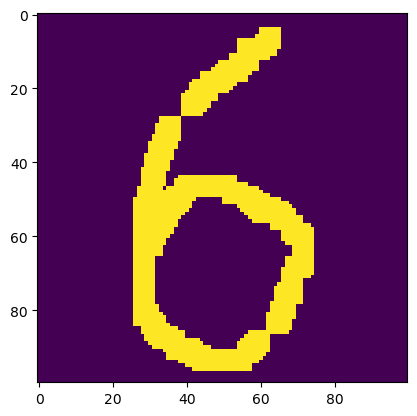

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_33531/1436343647.py", line 67, in input_drawing
    generate_scores()
  File "/tmp/ipykernel_33531/732574104.py", line 4, in generate_scores
    train_labels
NameError: name 'train_labels' is not defined


In [10]:
#import modules
from tkinter import*
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sys import exit


#import dataset function
#import_dataset()

#create filters function
#create_filters()




drawing = []

canvasx_dim = 1000
canvasy_dim = 500


coordinates = np.zeros((canvasy_dim,canvasx_dim), dtype='uint8')
digit_draw = np.zeros((canvasy_dim,canvasx_dim), dtype='uint8')

def display_coordinates(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y
    
def draw_smth(event):
    global lasx, lasy
    my_label['text']=f'x={event.x} y={event.y}'
    coordinates[event.y][event.x] = 255
    my_canvas.create_line((lasx, lasy, event.x, event.y), width = 5)
    lasx, lasy = event.x, event.y

def input_drawing(event):
    global coordinates, digit_draw
    
    #delete canvas
    my_canvas.delete("all")

    #insert pixel data of current canvas into digit_draw array
    for y in range(coordinates.shape[0]):
        for x in range(coordinates.shape[1]):
            if (coordinates[y][x] > 0):
                for m in range (y-4, y+4):
                    for n in range (x-4, x+4):
                        digit_draw[m][n] = 255
               
    #save processes
    digit_draw = np.transpose(digit_draw)
    plt.imshow(np.transpose(digit_draw))
    plt.show()
    drawing.append(np.transpose(digit_draw))
    coordinates = np.zeros((canvasy_dim,canvasx_dim), dtype='uint8')
    digit_draw = np.zeros((canvasy_dim,canvasx_dim), dtype='uint8')
    
    #crop drawing function
    crop_drawing()
    
    #resize drawing function
    center_images()
    
    #find scores function
    generate_scores()
    
    #print equation and result function
    print_eqn_and_result()
    
    
    

my_window = Tk()
my_canvas = Canvas(my_window, width=canvasx_dim, height=canvasy_dim, background='white')
my_canvas.pack()
my_label = Label(bd=4, relief="solid", font = "Times 22 bold", bg = "white", fg="black")
my_canvas.bind('<Button-1>', display_coordinates)
my_canvas.bind('<B1-Motion>', draw_smth)
my_window.bind_all("<space>", input_drawing)
my_canvas.grid(row=0,column=0)
my_label.grid(row=1,column=0)
my_window.mainloop()

#print(train_labels)
#print(train_images)


## Save train_images and train_labels to csv file for permanent dataset storage

In [36]:
starting_index = 121 #change this number to be equal to the largest (last) dataset_index value in your train_images folder

print(len(train_labels))

counter = 0

for i in range(starting_index, starting_index+len(train_labels)):
    np.savetxt(f"C:\\Users\\Marko Visnjic\\Custom_HandwrittenMultiDigits_Dataset\\train_images\\dataset_index__{i+1}.csv", train_images[i-starting_index], delimiter=",")

with open('C:\\Users\\Marko Visnjic\\Custom_HandwrittenMultiDigits_Dataset\\train_labels\\train_labels.csv', 'a') as f:
    np.savetxt(f, train_labels, delimiter=",")

19


## Create filters, and guess numbers based on filters

To check for overlap with the filter, take the pixel value of the input, substract that value with the value of the pixel at the same position in the filter, and then take the absolute value of that. Save these results into a new matrix, then when this operation is done for all of the pixels, sum all of the pixels together. The filter that produces a matrix whose sum is the smallest should identify which digit the input was.

## Script for creating test labels

[]


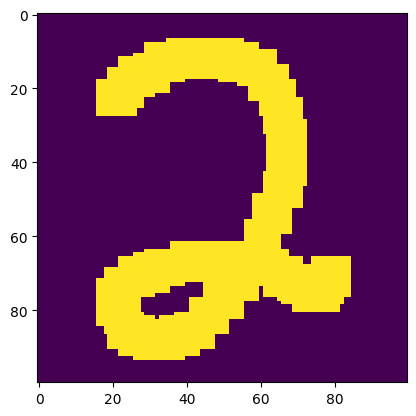

KeyboardInterrupt: Interrupted by user

In [42]:
import numpy as np
train_labels = []
index_of_images_to_remove = []

print(train_labels)

for i in range(0, len(train_images)):
    plt.imshow(train_images[i])
    plt.show()
    label = input('What number is shown?\n')
    
    if (label != ''):
        train_labels.append(label)
    else:
        index_of_images_to_remove.append(i)

train_labels = np.array(train_labels, dtype = 'uint8')
print(train_labels)
print(index_of_images_to_remove)

for i in range(len(index_of_images_to_remove)-1,-1,-1):
    print(i)
    del train_images[index_of_images_to_remove[i]]

for i in range(len(train_images)):
    plt.imshow(train_images[i])
    plt.show()


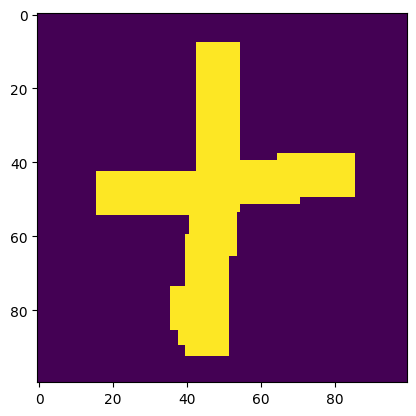

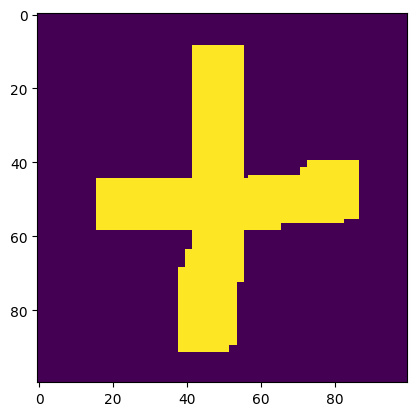

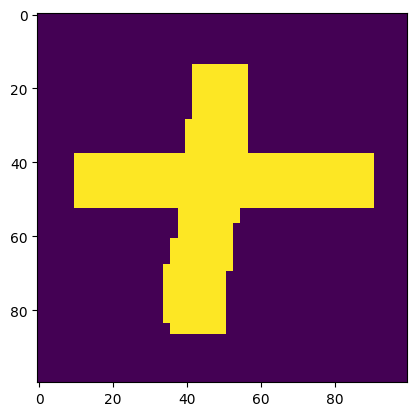

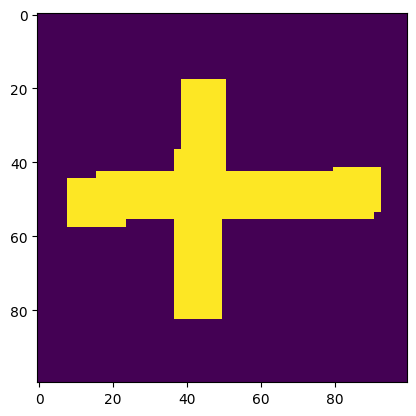

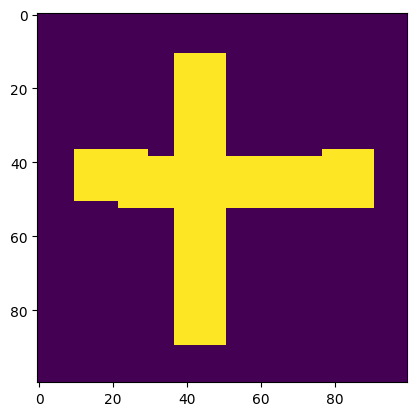

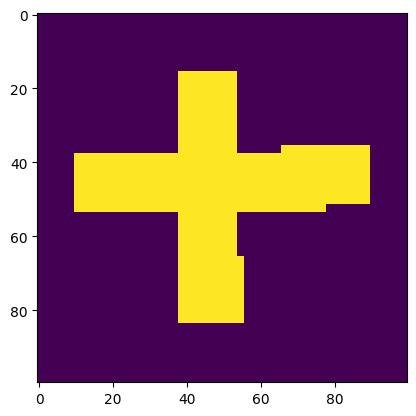

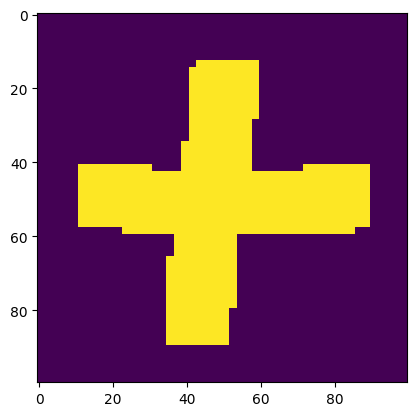

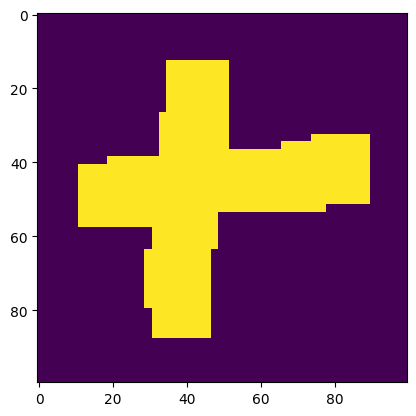

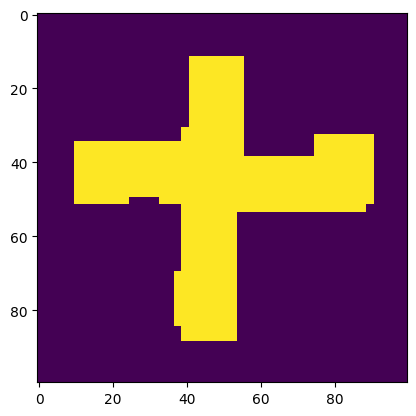

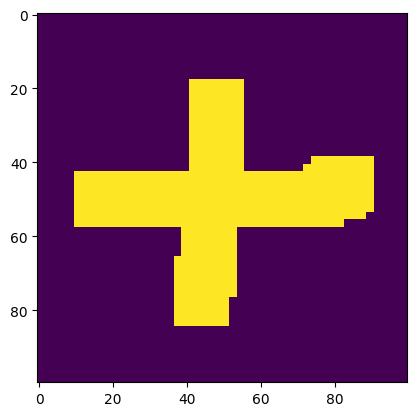

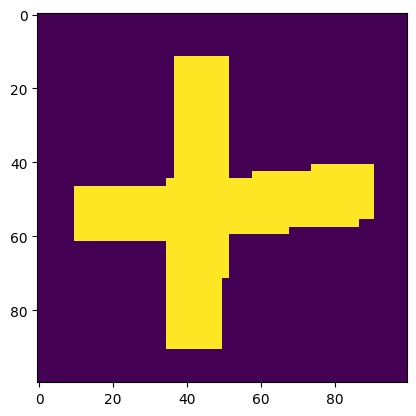

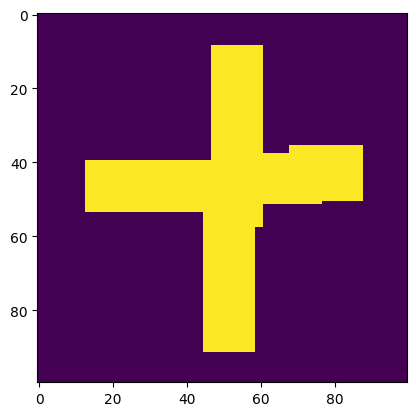

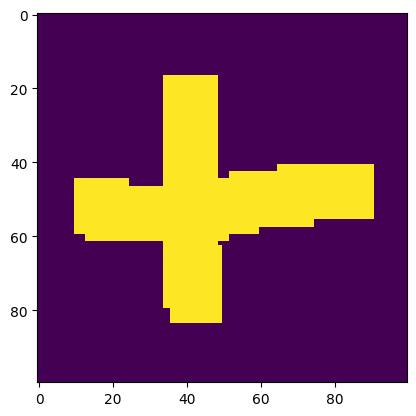

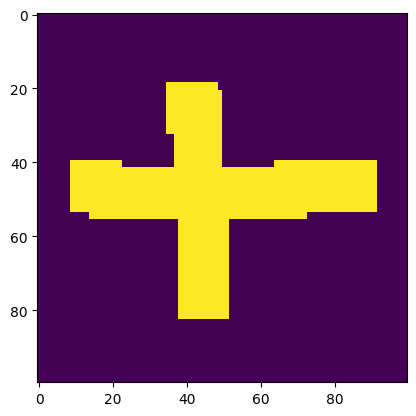

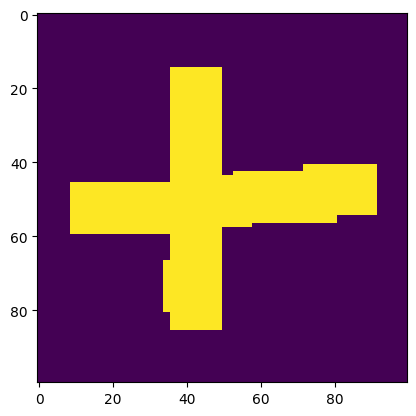

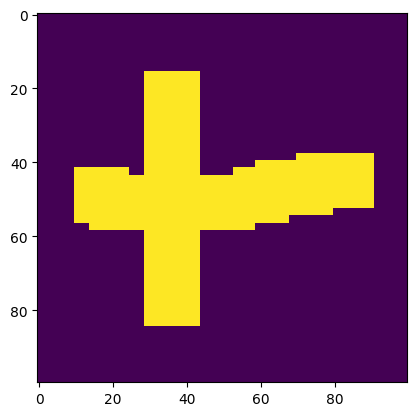

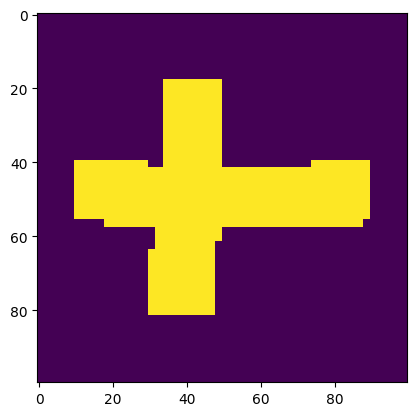

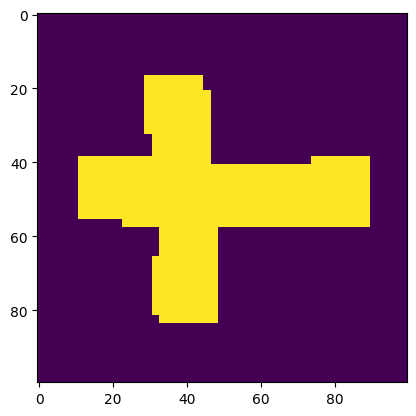

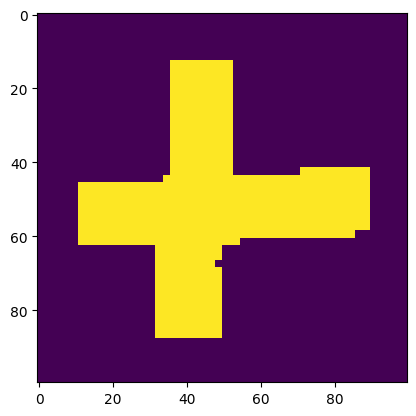

In [35]:
for i in range(len(train_images)):
    plt.imshow(train_images[i])
    plt.show()